# Imputing 


# Data Acquisition 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import acquire
import modeling_scaling
#visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
pd.set_option('display.max_columns', None)
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
# for use later after mvp
# df_no_age = acquire.wrangle(df)

In [5]:
train, validate, test=acquire.split_credit_defult_df(df)
train.shape, validate.shape, test.shape

((18244, 12), (7820, 12), (6517, 12))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18244 entries, 19101 to 19023
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  18244 non-null  int64  
 1   person_income               18244 non-null  int64  
 2   person_home_ownership       18244 non-null  object 
 3   person_emp_length           17765 non-null  float64
 4   loan_intent                 18244 non-null  object 
 5   loan_grade                  18244 non-null  object 
 6   loan_amnt                   18244 non-null  int64  
 7   loan_int_rate               16463 non-null  float64
 8   loan_status                 18244 non-null  int64  
 9   loan_percent_income         18244 non-null  float64
 10  cb_person_default_on_file   18244 non-null  object 
 11  cb_person_cred_hist_length  18244 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 1.8+ MB


In [7]:
train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,18244.000000,1.824400e+04,17765.000000,18244.000000,16463.000000,18244.000000,18244.000000,18244.000000
mean,27.664218,6.640949e+04,4.794652,9616.391690,11.043765,0.218921,0.170453,5.783216
std,6.178807,6.908109e+04,4.232710,6341.858143,3.248924,0.413526,0.106586,4.021196
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.868200e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12250.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,22.110000,1.000000,0.780000,30.000000


#### person_age, person_emp_length have strange outliers... 144 max age and 123 person emp_length of 123

In [8]:
train.person_age.value_counts()

23     2207
22     2040
24     1973
25     1750
26     1343
27     1211
28     1041
29      911
30      752
21      707
31      637
32      523
33      475
34      396
35      345
36      301
37      281
38      217
39      180
40      154
41      125
42      103
43       92
44       79
45       55
46       50
47       46
48       40
50       26
49       24
52       21
51       20
54       16
53       16
58       11
20       10
55       10
57        9
60        6
62        6
64        5
61        5
66        4
70        4
56        4
69        3
59        3
63        2
73        1
76        1
144       1
65        1
84        1
Name: person_age, dtype: int64

In [9]:
train.person_emp_length.value_counts()

0.0      2293
2.0      2115
3.0      1953
5.0      1654
1.0      1648
4.0      1632
6.0      1526
7.0      1238
8.0       955
9.0       766
11.0      392
10.0      372
12.0      315
13.0      233
14.0      187
15.0      123
16.0       88
17.0       75
18.0       57
19.0       36
20.0       33
21.0       25
22.0       13
24.0        8
23.0        7
25.0        6
26.0        3
27.0        3
28.0        2
123.0       2
30.0        2
31.0        1
34.0        1
29.0        1
Name: person_emp_length, dtype: int64

In [10]:
# removing max from the two columns

In [11]:
train = train[train['person_age'] != 144]

In [12]:
train = train[train['person_emp_length'] != 123]

In [13]:
train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,18241.000000,1.824100e+04,17762.000000,18241.000000,16460.000000,18241.000000,18241.000000,18241.000000
mean,27.658517,6.607772e+04,4.780937,9614.683954,11.043634,0.218902,0.170444,5.782413
std,6.118637,5.330824e+04,4.042568,6339.035597,3.248772,0.413514,0.106541,4.018934
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.862800e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12225.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,34.000000,35000.000000,22.110000,1.000000,0.780000,30.000000


### encode the categorical and ordinal variables for imputing purposes

In [14]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
train["loan_grade_code"] = ord_enc.fit_transform(train[["loan_grade"]])
train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_code
19101,30,30000,OWN,14.0,PERSONAL,A,5000,7.14,0,0.17,N,7,0.0
15987,25,85000,MORTGAGE,9.0,MEDICAL,A,4000,7.88,0,0.05,N,3,0.0
5348,24,39000,MORTGAGE,8.0,HOMEIMPROVEMENT,C,5000,NaN,1,0.13,N,3,2.0
5269,24,50000,RENT,8.0,MEDICAL,B,5000,9.25,0,0.10,N,3,1.0
23479,29,63000,OWN,0.0,MEDICAL,B,9000,NaN,0,0.14,N,9,1.0


In [15]:
# encode the categorical and ordinal variables
dummy_df = pd.get_dummies(train[["person_home_ownership", "loan_intent","cb_person_default_on_file"]], dummy_na =False, drop_first = [True,True])
encoded_train = pd.concat([train, dummy_df], axis = 1)
encoded_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_code,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
19101,30,30000,OWN,14.0,PERSONAL,A,5000,7.14,0,0.17,N,7,0.0,0,1,0,0,0,0,1,0,0
15987,25,85000,MORTGAGE,9.0,MEDICAL,A,4000,7.88,0,0.05,N,3,0.0,0,0,0,0,0,1,0,0,0
5348,24,39000,MORTGAGE,8.0,HOMEIMPROVEMENT,C,5000,NaN,1,0.13,N,3,2.0,0,0,0,0,1,0,0,0,0
5269,24,50000,RENT,8.0,MEDICAL,B,5000,9.25,0,0.10,N,3,1.0,0,0,1,0,0,1,0,0,0
23479,29,63000,OWN,0.0,MEDICAL,B,9000,NaN,0,0.14,N,9,1.0,0,1,0,0,0,1,0,0,0


In [16]:
#scale the data
columns_to_scale =  ["person_age","person_income","loan_amnt","loan_percent_income","cb_person_cred_hist_length"]
train_scaled, validate_scaled, test_scaled  = modeling_scaling.scaling_minmax(train, validate, test, columns_to_scale)


In [17]:
train_scaled_new = train_scaled[["person_age","person_income","loan_amnt","person_emp_length","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]]


In [18]:
train_scaled_new.head()

,person_age,person_income,loan_amnt,person_emp_length,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
19101,0.156250,0.012674,0.130435,14.0,7.14,0.217949,0.178571
15987,0.078125,0.039694,0.101449,9.0,7.88,0.064103,0.035714
5348,0.062500,0.017096,0.130435,8.0,NaN,0.166667,0.035714
5269,0.062500,0.022500,0.130435,8.0,9.25,0.128205,0.035714
23479,0.140625,0.028886,0.246377,0.0,NaN,0.179487,0.250000


In [19]:
new_train = pd.concat([train, dummy_df, train_scaled_new], axis = 1)


In [20]:
new_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_code,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,person_age,person_income,loan_amnt,person_emp_length,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
19101,30,30000,OWN,14.0,PERSONAL,A,5000,7.14,0,0.17,N,7,0.0,0,1,0,0,0,0,1,0,0,0.156250,0.012674,0.130435,14.0,7.14,0.217949,0.178571
15987,25,85000,MORTGAGE,9.0,MEDICAL,A,4000,7.88,0,0.05,N,3,0.0,0,0,0,0,0,1,0,0,0,0.078125,0.039694,0.101449,9.0,7.88,0.064103,0.035714
5348,24,39000,MORTGAGE,8.0,HOMEIMPROVEMENT,C,5000,NaN,1,0.13,N,3,2.0,0,0,0,0,1,0,0,0,0,0.062500,0.017096,0.130435,8.0,NaN,0.166667,0.035714
5269,24,50000,RENT,8.0,MEDICAL,B,5000,9.25,0,0.10,N,3,1.0,0,0,1,0,0,1,0,0,0,0.062500,0.022500,0.130435,8.0,9.25,0.128205,0.035714
23479,29,63000,OWN,0.0,MEDICAL,B,9000,NaN,0,0.14,N,9,1.0,0,1,0,0,0,1,0,0,0,0.140625,0.028886,0.246377,0.0,NaN,0.179487,0.250000


In [21]:
df_to_impute = pd.concat([train_scaled_new, dummy_df], axis = 1)


In [22]:
df_to_impute.head()

,person_age,person_income,loan_amnt,person_emp_length,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
19101,0.156250,0.012674,0.130435,14.0,7.14,0.217949,0.178571,0,1,0,0,0,0,1,0,0
15987,0.078125,0.039694,0.101449,9.0,7.88,0.064103,0.035714,0,0,0,0,0,1,0,0,0
5348,0.062500,0.017096,0.130435,8.0,NaN,0.166667,0.035714,0,0,0,0,1,0,0,0,0
5269,0.062500,0.022500,0.130435,8.0,9.25,0.128205,0.035714,0,0,1,0,0,1,0,0,0
23479,0.140625,0.028886,0.246377,0.0,NaN,0.179487,0.250000,0,1,0,0,0,1,0,0,0


In [23]:
df_to_impute.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18241 entries, 19101 to 19023
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   18241 non-null  float64
 1   person_income                18241 non-null  float64
 2   loan_amnt                    18241 non-null  float64
 3   person_emp_length            17762 non-null  float64
 4   loan_int_rate                16460 non-null  float64
 5   loan_percent_income          18241 non-null  float64
 6   cb_person_cred_hist_length   18241 non-null  float64
 7   person_home_ownership_OTHER  18241 non-null  uint8  
 8   person_home_ownership_OWN    18241 non-null  uint8  
 9   person_home_ownership_RENT   18241 non-null  uint8  
 10  loan_intent_EDUCATION        18241 non-null  uint8  
 11  loan_intent_HOMEIMPROVEMENT  18241 non-null  uint8  
 12  loan_intent_MEDICAL          18241 non-null  uint8  
 13  loan_intent_

In [24]:
def unique_column(df):
    df_columns = df.columns
    new_columns = []
    for item in df_columns:
        counter = 0
        newitem = item
        while newitem in new_columns:
            counter += 1
            newitem = "{}_{}".format(item, counter)
        new_columns.append(newitem)
    df.columns = new_columns
    return df

In [25]:
df_to_impute = unique_column(df_to_impute)


In [26]:
df_to_impute.head()

,person_age,person_income,loan_amnt,person_emp_length,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
19101,0.156250,0.012674,0.130435,14.0,7.14,0.217949,0.178571,0,1,0,0,0,0,1,0,0
15987,0.078125,0.039694,0.101449,9.0,7.88,0.064103,0.035714,0,0,0,0,0,1,0,0,0
5348,0.062500,0.017096,0.130435,8.0,NaN,0.166667,0.035714,0,0,0,0,1,0,0,0,0
5269,0.062500,0.022500,0.130435,8.0,9.25,0.128205,0.035714,0,0,1,0,0,1,0,0,0
23479,0.140625,0.028886,0.246377,0.0,NaN,0.179487,0.250000,0,1,0,0,0,1,0,0,0


In [27]:
from sklearn.experimental import enable_iterative_imputer


In [28]:
from sklearn.impute import IterativeImputer

In [29]:
X = df_to_impute


In [30]:
# looing at the nan rows
df_with_nan = X[X.isna().any(axis=1)]

In [31]:
# imputing the loan int rate
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
imp = IterativeImputer(estimator = lr)

In [32]:
imp.fit(X)

IterativeImputer(estimator=LinearRegression())

In [33]:
np_imputed = imp.transform(X)

In [34]:

df_imputed = pd.DataFrame(np_imputed, columns=X.columns)

In [35]:
df_imputed.isna().mean()

person_age                     0.0
person_income                  0.0
loan_amnt                      0.0
person_emp_length              0.0
loan_int_rate                  0.0
loan_percent_income            0.0
cb_person_cred_hist_length     0.0
person_home_ownership_OTHER    0.0
person_home_ownership_OWN      0.0
person_home_ownership_RENT     0.0
loan_intent_EDUCATION          0.0
loan_intent_HOMEIMPROVEMENT    0.0
loan_intent_MEDICAL            0.0
loan_intent_PERSONAL           0.0
loan_intent_VENTURE            0.0
cb_person_default_on_file_Y    0.0
dtype: float64

In [36]:
df_imputed_2columns = df_imputed[["loan_int_rate","person_emp_length"]]

In [37]:
imputed_and_concated = pd.concat([df_to_impute, df_imputed_2columns.set_index(df_to_impute.index)], axis=1)


In [38]:
imputed_and_concated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18241 entries, 19101 to 19023
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   18241 non-null  float64
 1   person_income                18241 non-null  float64
 2   loan_amnt                    18241 non-null  float64
 3   person_emp_length            17762 non-null  float64
 4   loan_int_rate                16460 non-null  float64
 5   loan_percent_income          18241 non-null  float64
 6   cb_person_cred_hist_length   18241 non-null  float64
 7   person_home_ownership_OTHER  18241 non-null  uint8  
 8   person_home_ownership_OWN    18241 non-null  uint8  
 9   person_home_ownership_RENT   18241 non-null  uint8  
 10  loan_intent_EDUCATION        18241 non-null  uint8  
 11  loan_intent_HOMEIMPROVEMENT  18241 non-null  uint8  
 12  loan_intent_MEDICAL          18241 non-null  uint8  
 13  loan_intent_

In [39]:
imputed_and_concated = unique_column(imputed_and_concated)


In [40]:
imputed_and_concated[imputed_and_concated.isna().any(axis = 1)]

,person_age,person_income,loan_amnt,person_emp_length,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_int_rate_1,person_emp_length_1
5348,0.062500,0.017096,0.130435,8.0,NaN,0.166667,0.035714,0,0,0,0,1,0,0,0,0,9.602944,8.0
23479,0.140625,0.028886,0.246377,0.0,NaN,0.179487,0.250000,0,1,0,0,0,1,0,0,0,10.444868,0.0
27234,0.187500,0.060820,0.304348,0.0,NaN,0.115385,0.214286,0,1,0,0,0,0,0,1,0,10.356604,0.0
5495,0.062500,0.027902,0.130435,8.0,NaN,0.102564,0.000000,0,0,1,0,1,0,0,0,0,10.416229,8.0
28236,0.156250,0.014640,0.202899,1.0,NaN,0.282051,0.214286,0,0,1,0,1,0,0,0,1,14.938035,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18327,0.187500,0.015868,0.565217,2.0,NaN,0.705128,0.214286,0,0,1,0,0,0,0,0,1,15.496827,2.0
5120,0.062500,0.026823,0.246377,4.0,NaN,0.192308,0.000000,0,0,1,1,0,0,0,0,0,10.621424,4.0
29927,0.421875,0.066713,0.275362,4.0,NaN,0.089744,0.392857,0,0,1,0,0,0,0,1,1,14.681122,4.0
30001,0.250000,0.019159,0.304348,13.0,NaN,0.320513,0.357143,0,0,0,0,0,0,0,0,0,9.755768,13.0


In [41]:
imputed_and_concated.drop(columns = ["loan_int_rate", "person_emp_length"],inplace = True)

In [42]:
imputed_and_concated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18241 entries, 19101 to 19023
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   18241 non-null  float64
 1   person_income                18241 non-null  float64
 2   loan_amnt                    18241 non-null  float64
 3   loan_percent_income          18241 non-null  float64
 4   cb_person_cred_hist_length   18241 non-null  float64
 5   person_home_ownership_OTHER  18241 non-null  uint8  
 6   person_home_ownership_OWN    18241 non-null  uint8  
 7   person_home_ownership_RENT   18241 non-null  uint8  
 8   loan_intent_EDUCATION        18241 non-null  uint8  
 9   loan_intent_HOMEIMPROVEMENT  18241 non-null  uint8  
 10  loan_intent_MEDICAL          18241 non-null  uint8  
 11  loan_intent_PERSONAL         18241 non-null  uint8  
 12  loan_intent_VENTURE          18241 non-null  uint8  
 13  cb_person_de

In [43]:
imputed_and_concated.head()

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_int_rate_1,person_emp_length_1
19101,0.156250,0.012674,0.130435,0.217949,0.178571,0,1,0,0,0,0,1,0,0,7.140000,14.0
15987,0.078125,0.039694,0.101449,0.064103,0.035714,0,0,0,0,0,1,0,0,0,7.880000,9.0
5348,0.062500,0.017096,0.130435,0.166667,0.035714,0,0,0,0,1,0,0,0,0,9.602944,8.0
5269,0.062500,0.022500,0.130435,0.128205,0.035714,0,0,1,0,0,1,0,0,0,9.250000,8.0
23479,0.140625,0.028886,0.246377,0.179487,0.250000,0,1,0,0,0,1,0,0,0,10.444868,0.0


In [44]:
train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_code
19101,30,30000,OWN,14.0,PERSONAL,A,5000,7.14,0,0.17,N,7,0.0
15987,25,85000,MORTGAGE,9.0,MEDICAL,A,4000,7.88,0,0.05,N,3,0.0
5348,24,39000,MORTGAGE,8.0,HOMEIMPROVEMENT,C,5000,NaN,1,0.13,N,3,2.0
5269,24,50000,RENT,8.0,MEDICAL,B,5000,9.25,0,0.10,N,3,1.0
23479,29,63000,OWN,0.0,MEDICAL,B,9000,NaN,0,0.14,N,9,1.0


In [45]:
train.loan_int_rate = imputed_and_concated["loan_int_rate_1"]


In [46]:
train.person_emp_length = imputed_and_concated["person_emp_length_1"]


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18241 entries, 19101 to 19023
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  18241 non-null  int64  
 1   person_income               18241 non-null  int64  
 2   person_home_ownership       18241 non-null  object 
 3   person_emp_length           18241 non-null  float64
 4   loan_intent                 18241 non-null  object 
 5   loan_grade                  18241 non-null  object 
 6   loan_amnt                   18241 non-null  int64  
 7   loan_int_rate               18241 non-null  float64
 8   loan_status                 18241 non-null  int64  
 9   loan_percent_income         18241 non-null  float64
 10  cb_person_default_on_file   18241 non-null  object 
 11  cb_person_cred_hist_length  18241 non-null  int64  
 12  loan_grade_code             18241 non-null  float64
dtypes: float64(4), int64(5), ob

In [48]:
train.to_csv("train_imputed", index = 0)

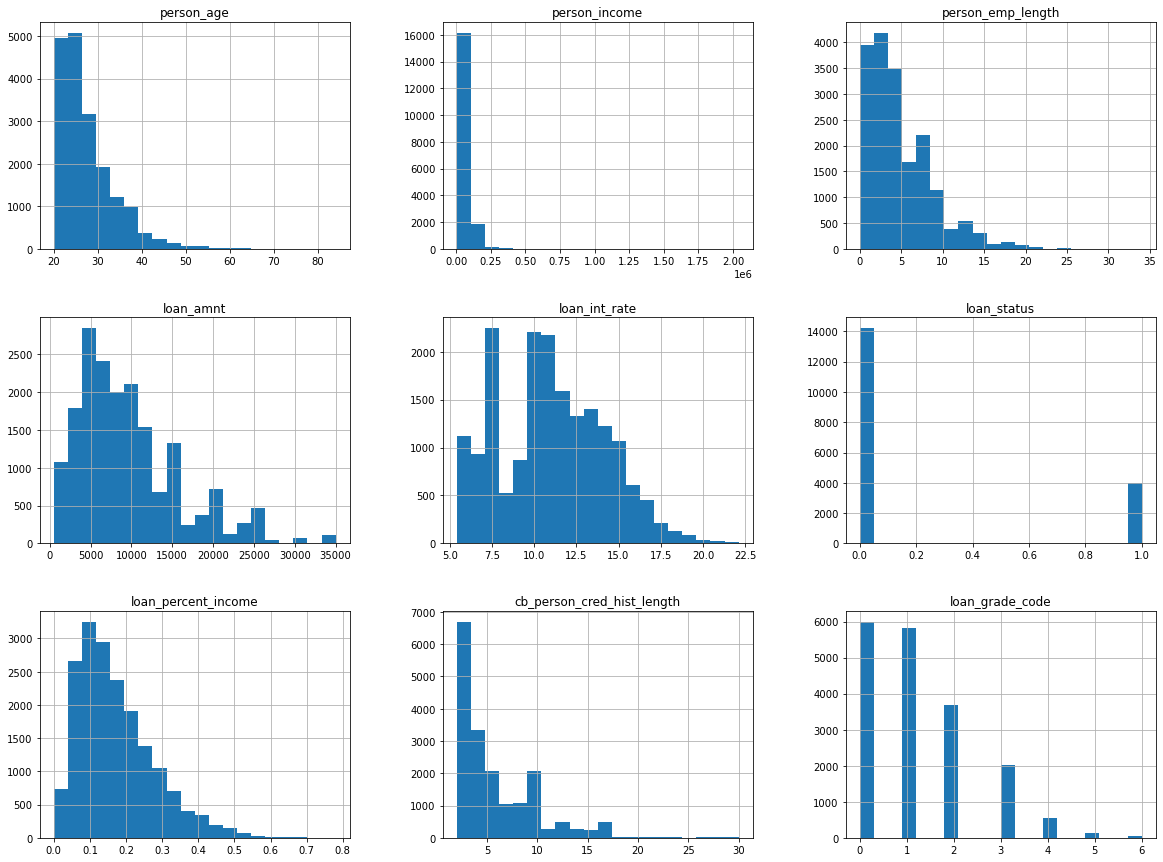

In [49]:
train.hist(bins = 20,figsize =  (20,15));


### Univariate analysis


<AxesSubplot:>

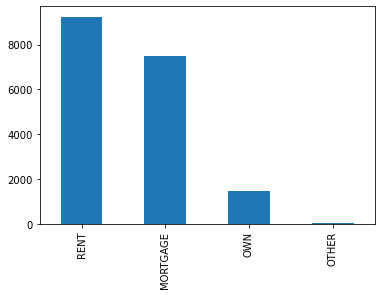

In [50]:
# plotting personal home ownership numbers
train["person_home_ownership"].value_counts().plot.bar()

#### What does the plot tell us? It tells us that there are more people who are taking loans that are renters than those who have mortgages or own homes 

<AxesSubplot:>

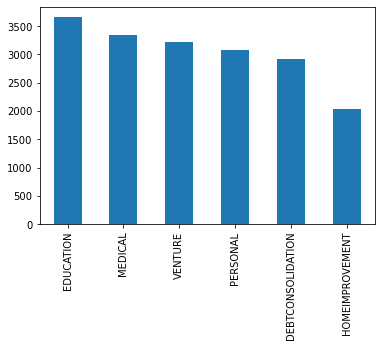

In [51]:
# plotting loan intentions
train["loan_intent"].value_counts().plot.bar()

<AxesSubplot:>

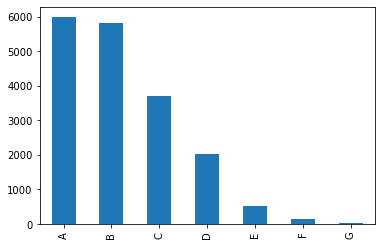

In [52]:
train["loan_grade"].value_counts().plot.bar()

#### The plot tells us that there are more people seeking loans for education. However, the difference among the reasons is not so significant

<AxesSubplot:>

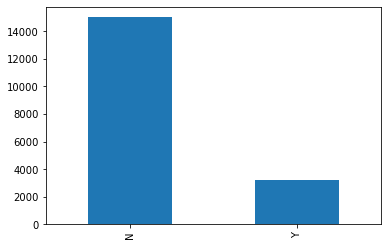

In [53]:
# visualizing the distribution of people who have defaulted
train["cb_person_default_on_file"].value_counts().plot.bar()

#### it appears that that a majority of people do not defult on their loans

## Feature Engineering

In [54]:
 train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_code
19101,30,30000,OWN,14.0,PERSONAL,A,5000,7.140000,0,0.17,N,7,0.0
15987,25,85000,MORTGAGE,9.0,MEDICAL,A,4000,7.880000,0,0.05,N,3,0.0
5348,24,39000,MORTGAGE,8.0,HOMEIMPROVEMENT,C,5000,9.602944,1,0.13,N,3,2.0
5269,24,50000,RENT,8.0,MEDICAL,B,5000,9.250000,0,0.10,N,3,1.0
23479,29,63000,OWN,0.0,MEDICAL,B,9000,10.444868,0,0.14,N,9,1.0


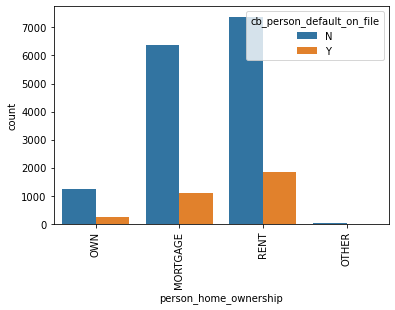

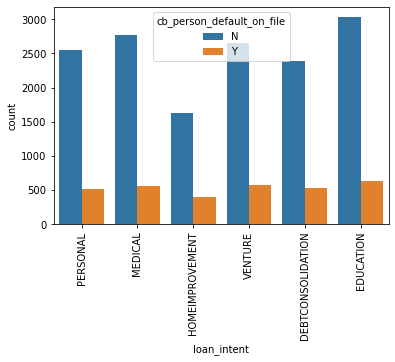

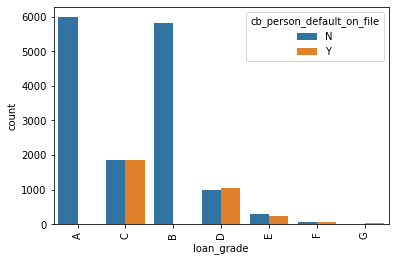

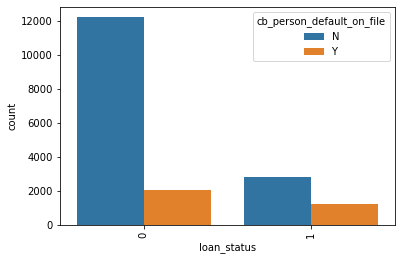

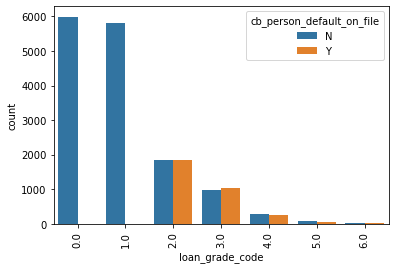

In [55]:
for i, predictor in enumerate(train.drop(columns=["person_age","person_income","person_emp_length","loan_int_rate","loan_percent_income","cb_person_cred_hist_length","cb_person_default_on_file","loan_amnt"])):
    plt.figure(i)
    plot= sns.countplot(data=train, x=predictor, hue='cb_person_default_on_file')
    plt.setp(plot.get_xticklabels(), rotation=90) 
    

In [56]:
"person_age","person_income","person_emp_length","loan_int_rate","loan_percent_income","cb_person_cred_hist_length","cb_person_default_on_file","loan_amnt"

('person_age',
 'person_income',
 'person_emp_length',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'cb_person_default_on_file',
 'loan_amnt')

In [72]:
q = train["person_income"].quantile(0.97)


In [75]:
train = train[train["person_income"] < q]


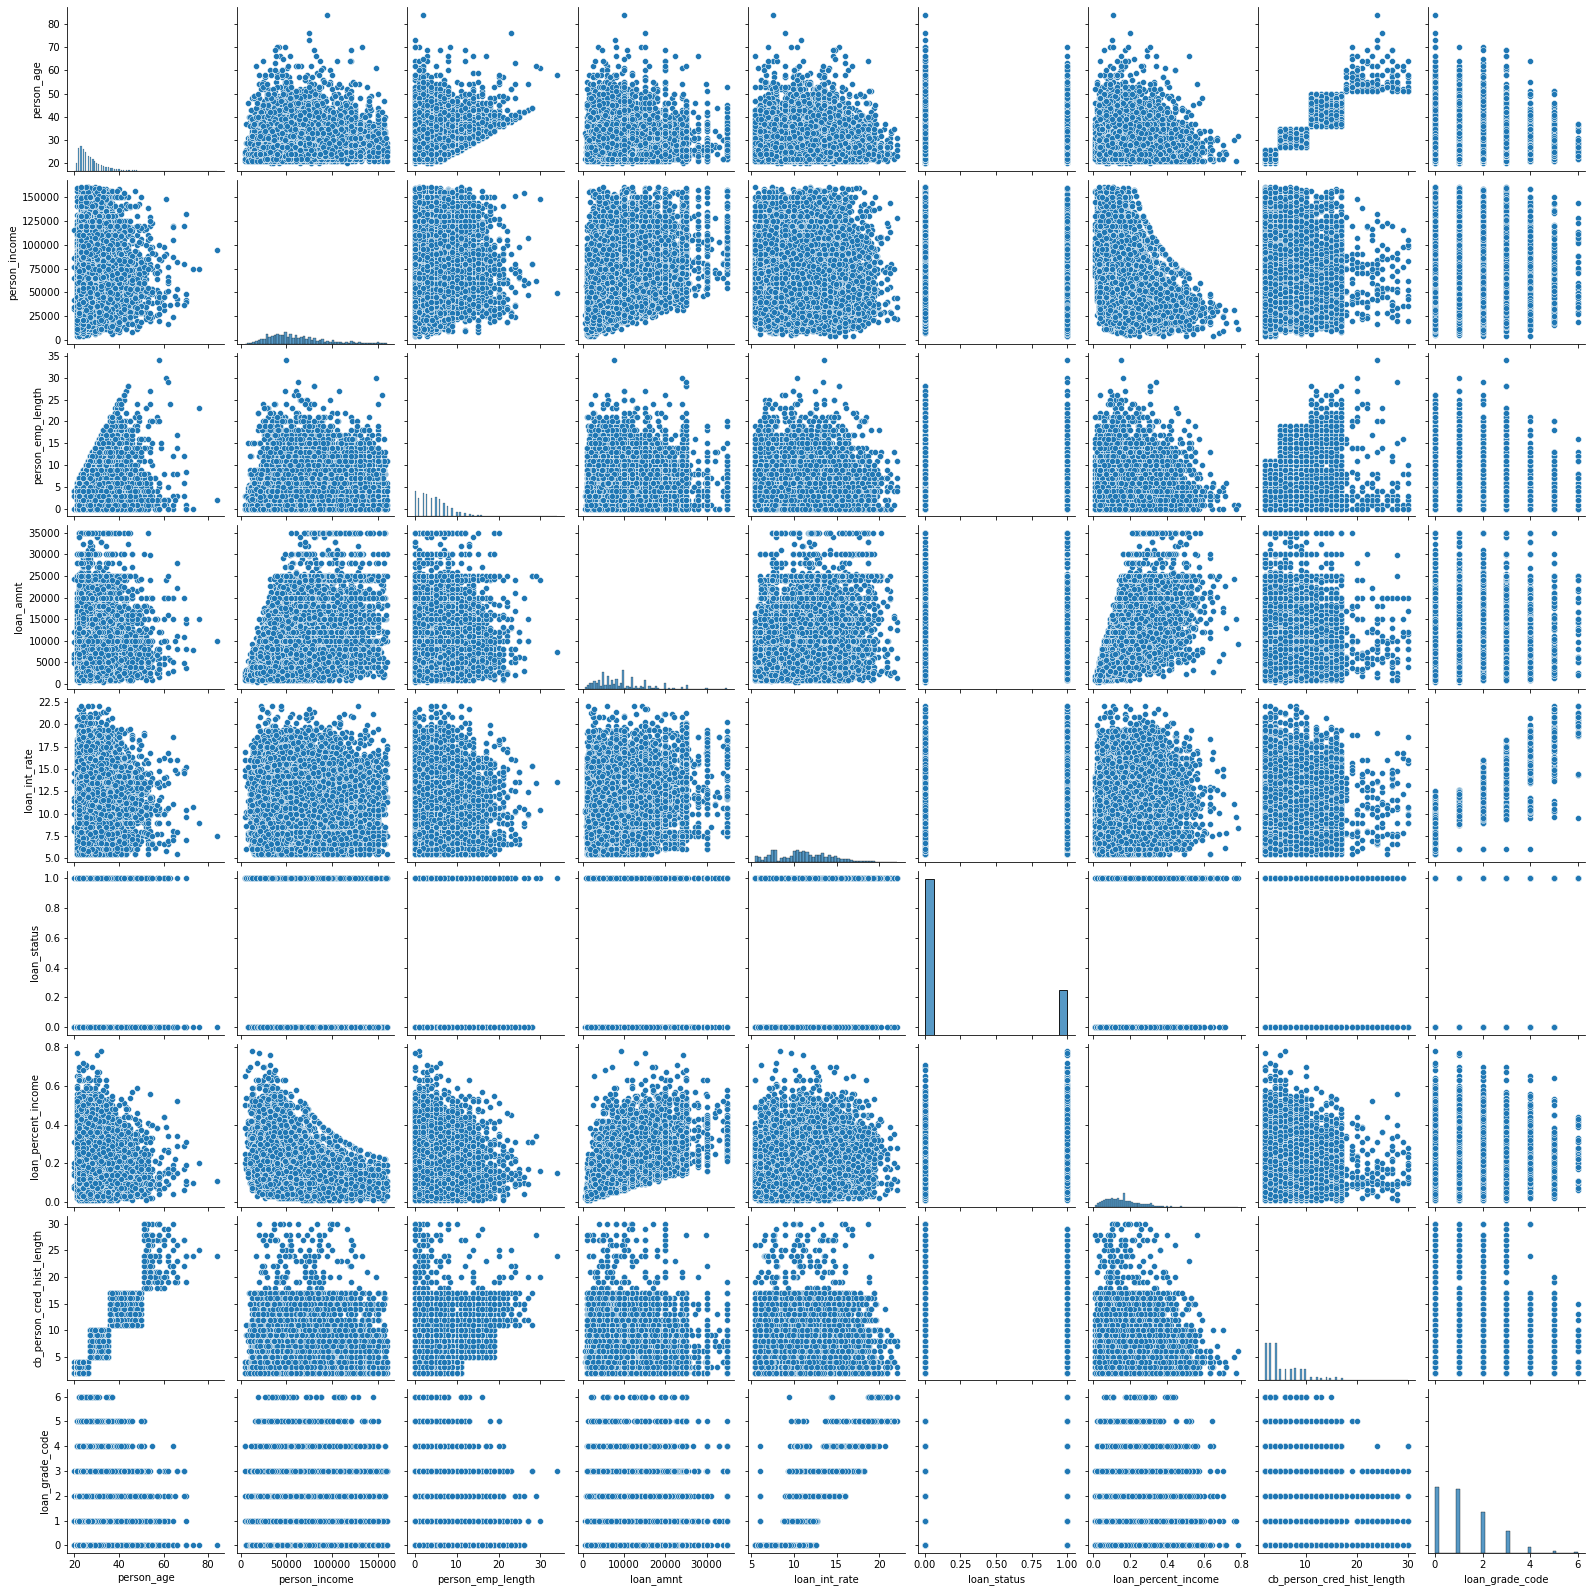

In [76]:
sns.pairplot(data = train)